In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

0 amplitudes: 0.95609 0
1 amplitudes: 0.70323 0
2 amplitudes: 0.40175 0
3 amplitudes: 0.13509 0
4 amplitudes: 0.15202 0
5 amplitudes: 0.07676 0
6 amplitudes: 0.06082 0
7 amplitudes: 0.04952 0
8 amplitudes: 0.01274 0
9 amplitudes: 0.00626 0


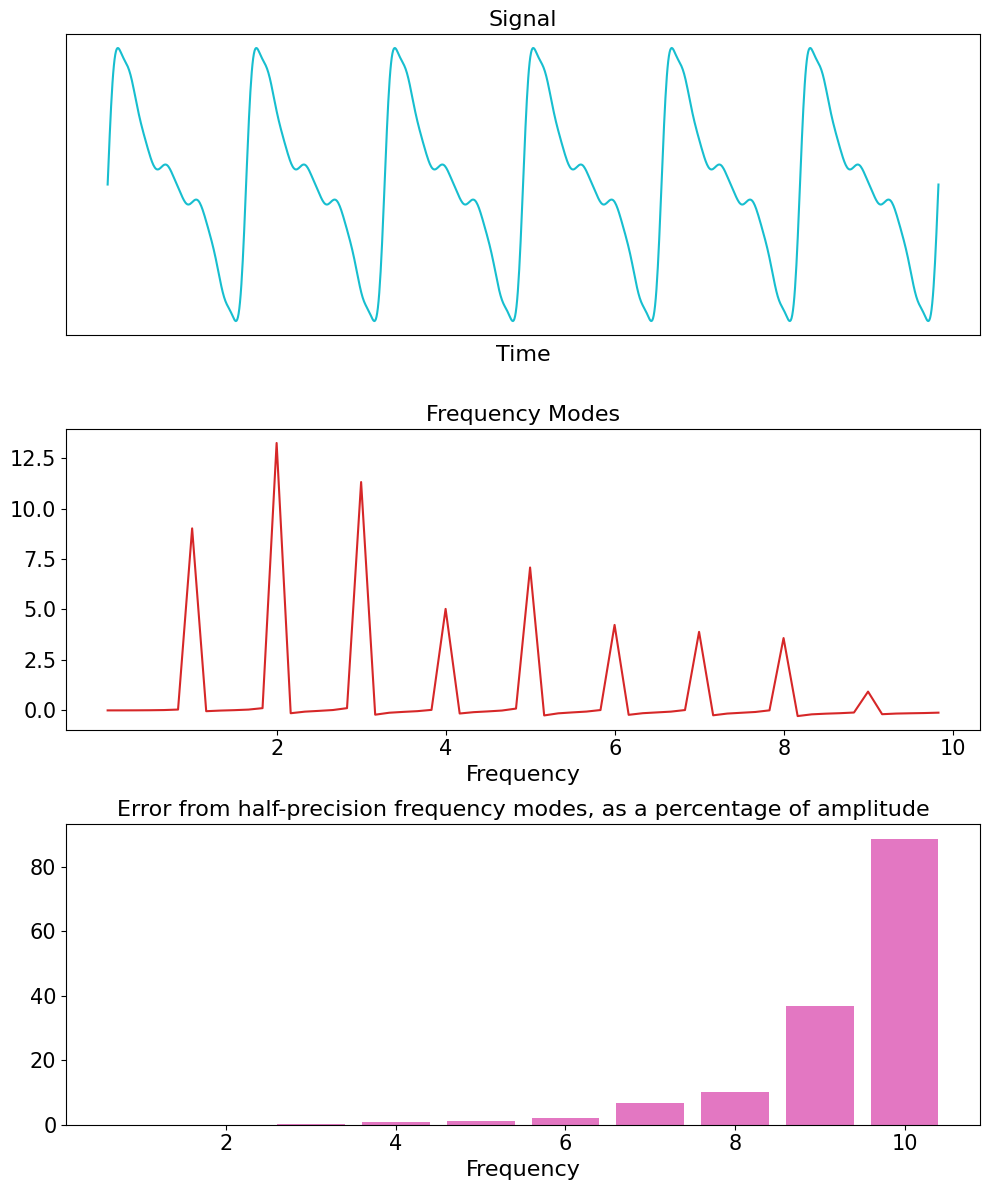

In [3]:
# Create a time series

max_t = 6
sample_rate = 200
t = np.linspace(0, max_t, max_t*sample_rate)

# Define the number of waves
num_frequencies = 10
decay_factor = .5

# Generate a signal as a sum of several sine and cosine waves 
# with amplitudes sampled from an exponential distribution
y = np.zeros_like(t)
amplitudes = []
for i in range(num_frequencies):
    sine_amp = np.exp(-decay_factor*i)*np.maximum(.1,np.random.normal(1,.3))
    cosine_amp = np.exp(-decay_factor*i)*np.maximum(.1,np.random.normal(1,.3))
    cosine_amp = 0
    amplitudes.append((sine_amp, cosine_amp))
    y += sine_amp * np.sin((i+1)*t * 2 * np.pi)
    y += cosine_amp * np.cos((i+1)*t* 2 * np.pi)

# Perform FFT in full and half precision
fft_full_precision = np.fft.fft(y).real
fft_half_precision = np.fft.fft(y.astype(np.float16)).real.astype(np.float16)
frequencies = np.fft.fftfreq(len(y), d=t[1]-t[0])

diff = fft_full_precision.astype(np.float16) - fft_half_precision

for i in range(num_frequencies):
    print(i, 'amplitudes:', np.round(amplitudes[i][0],5),np.round(amplitudes[i][1],5))
    #print('precision difference', np.abs(y_fft))


# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

colors = plt.cm.get_cmap('tab10', 4)

# Plot original signal
ax[0].plot(t, y,color=colors(3))
ax[0].set_title('Signal', fontsize=16)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('Time', fontsize=16)

k = 10* max_t
ax[1].plot(frequencies[:k], fft_full_precision[:k], label='full precision',color=colors(1))

ax[1].set_title('Frequency Modes', fontsize=16)
ax[1].set_xlabel('Frequency', fontsize=16)
ax[1].set_xticks([2,4,6,8,10],fontsize=16)

ax[1].tick_params(axis='both', which='major', labelsize=15)
#max_y = int(max(fft_full_precision[:k]))//2 * 2 + 4
#ax[1].set_yticks([i for i in range(0,max_y,2)],fontsize=16)
#ax[1].legend()

# Plot difference

bins = [i for i in range(num_frequencies)]
bin_values = [0 for _ in range(num_frequencies)]
idx = 0
for b in bins:
    while frequencies[idx] < b+1 and idx < k:
        #print(b)
        bin_values[b] += np.abs(diff[idx])
        idx += 1

bin_percents = [bin_values[i]/amplitudes[i][0]*100 for i in bins]

ax[2].bar([b + 1 for b in bins], bin_percents,color=colors(2))
ax[2].set_title('Error from half-precision frequency modes, as a percentage of amplitude', fontsize=16)
ax[2].set_xlabel('Frequency', fontsize=16)
ax[2].set_xticks([2,4,6,8,10],fontsize=16)
ax[2].tick_params(axis='both', which='major', labelsize=15)


plt.tight_layout()
plt.savefig('freq_mode_analysis.pdf')
plt.show()
